<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/CNNExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [35]:
#import data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
#scale data
X_train = X_train/255
X_test = X_test/255

In [38]:
#reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [39]:
#format target labels
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [52]:
#instantiate input shape and Sequential model
input_shape = X_train.shape[1:4]
model = Sequential()

In [53]:
#Convolutional layer
model.add(Conv2D(filters = 64, 
                 kernel_size = 7,
                 activation = 'relu',
                 input_shape = input_shape))
# Pooling layer
model.add(MaxPooling2D(pool_size = 2))

# Flattening layer
model.add(Flatten())

# Output layer
model.add(Dense(10,
                activation = 'softmax'))


In [54]:
#compile the model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['acc'])

In [55]:
#fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4370 - acc: 0.8451 - val_loss: 0.3570 - val_acc: 0.8763
Epoch 2/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3137 - acc: 0.8878 - val_loss: 0.3304 - val_acc: 0.8790
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2758 - acc: 0.9010 - val_loss: 0.2933 - val_acc: 0.8978
Epoch 4/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2505 - acc: 0.9098 - val_loss: 0.2917 - val_acc: 0.8983
Epoch 5/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2305 - acc: 0.9159 - val_loss: 0.2811 - val_acc: 0.9019
Epoch 6/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2104 - acc: 0.9247 - val_loss: 0.2754 - val_acc: 0.9032
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1935 - acc: 0.9285 - val_loss: 0.2790 - val_acc: 0.9072
Epoch 8/20
1875/1875 [==========================

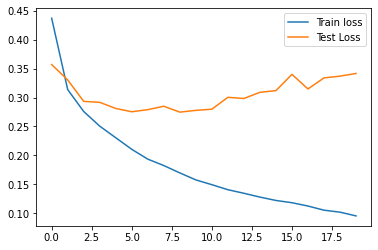

In [58]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

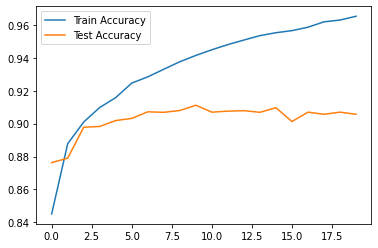

In [57]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend()
plt.show()